<a href="https://colab.research.google.com/github/PandukaBandara99/ML-Books/blob/main/AdvancedTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mahela Panduka Bandara ; <br> UG @ Dpt. of Electronic & Electrical Engineering ;<br> University of Peradeniya ;<br> 2024/03 <br><br> Email : e19039@end.pdn.ac.lk <br> LinkedIN : https://www.linkedin.com/in/pandukabandara/

Refferences: <br>
1 - https://www.coursera.org/specializations/tensorflow-advanced-techniques

# **1.0 Custom Models, Layers, and Loss Functions with TensorFlow**

## 1.1 Sequential and Functional APIs


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
from tensorflow.keras.models import Model

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### 1.1.1 Sequential API

The model is inputted as a list to the ```tf.keras.models.sequential()```

In [ ]:
def build_model_with_sequential():

    # instantiate a Sequential class and linearly stack the layers of your model
    seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return seq_model

### 1.1.2 Functional API

In [ ]:
'''
Syntax:

input_layer = tf.keras.input(shape = (<input_shape>))                            <------ Input object
layer_1 = tf.keras.layers.flatten()(input_layer)                                 <------ 1D array from input object
layer_2 = tf.keras.layers.<layer_type>(size,activation = tf.nn.<type>)(layer_1)  <------ output = new_layer* previous_layer
...
...
...

output_layer =  tf.keras.layers.Dense(10, activation=tf.nn.softmax)(preveous_layer)
func_model = Model(inputs=input_layer, outputs=output_layer)

---->return the func_model

'''

In [ ]:
def build_model_with_functional():

    # instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28, 28))

    # stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)

    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)

    return func_model

Note: <br>
> double parentheses syntax comes from a Python syntax and a shortcut that is used when using a function without explicitly storing it in a named variable.

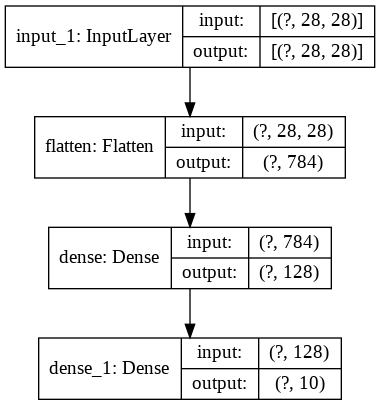

Training the model

Regardless if you built it with the Sequential or Functional API, you'll follow the same steps when training and evaluating your model.

In [ ]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4966 - accuracy: 0.8233
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3742 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3393 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3139 - accuracy: 0.8846
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8769


[0.3419346511363983, 0.8769000172615051]

## 1.2 Multi-Output Models

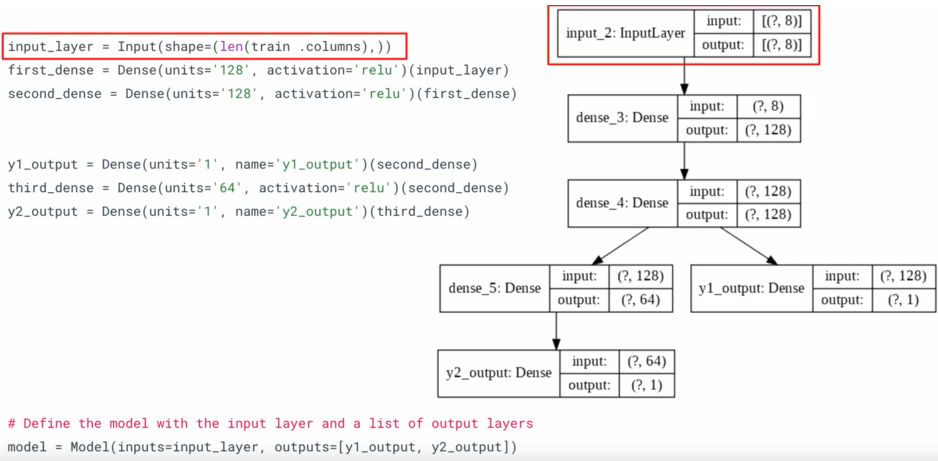

### **1.2.1 Exercise 1:** Energy Efficiency Model

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [ ]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

Prepare the Data

In [ ]:
# Specify data URI
URI = '/content/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

Build the Model

In [ ]:
# Define model layers.
input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 128)                  1152      ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 128)                  16512     ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 64)                   8256      ['dense_1[0][0]']             
                                                                                              

Configure parameters

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

Train the Model

In [ ]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

In [ ]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 7ms/step - loss: nan - y1_output_loss: nan - y2_output_loss: nan - y1_output_root_mean_squared_error: nan - y2_output_root_mean_squared_error: nan
Loss = nan, Y1_loss = nan, Y1_mse = nan, Y2_loss = nan, Y2_mse = nan


Predictions

5/5 [==============================] - 0s 4ms/step


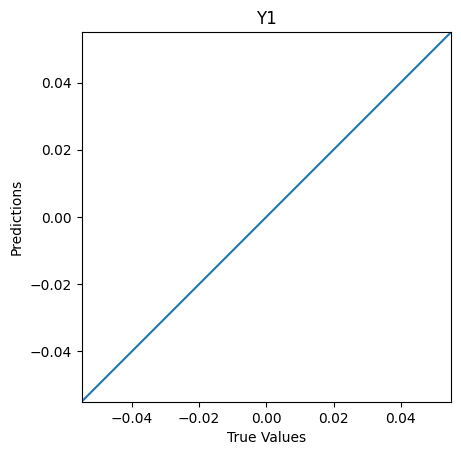

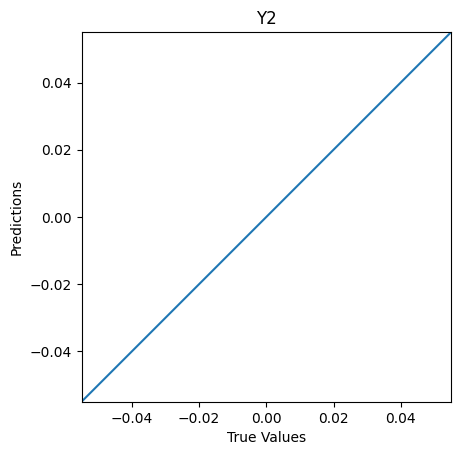

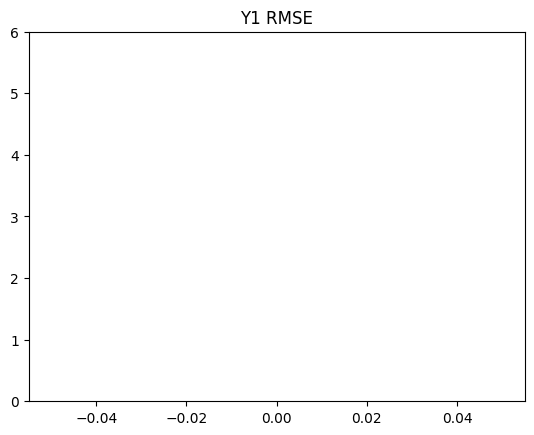

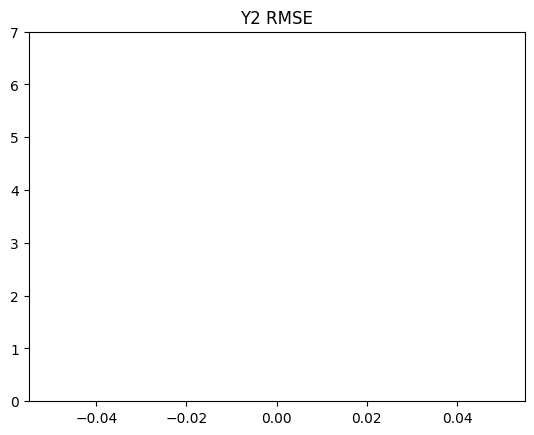

In [ ]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)

### 1.2.2 Siamese Network

 Siamese Network is used to find the similarity or dissimilarity between two items.

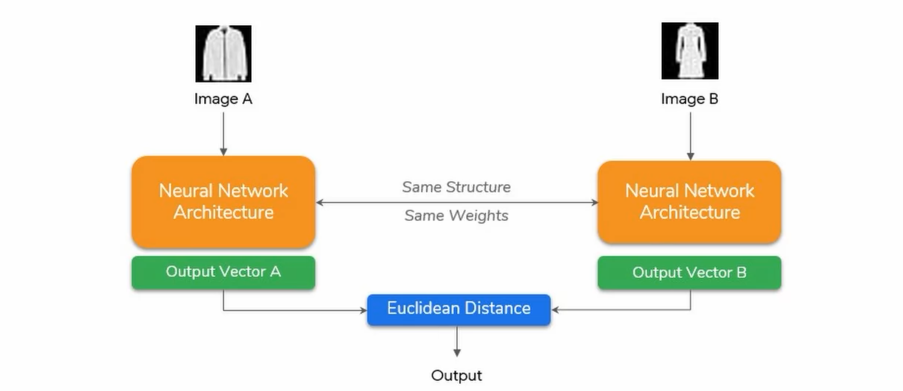

**Fashin mnist Dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random

Prepare the Dataset

In [ ]:
def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1

    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]

    return np.array(pairs), np.array(labels)


def create_pairs_on_set(images, labels):

    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype('float32')

    return pairs, y


def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

You can now download and prepare our train and test sets. You will also create pairs of images that will go into the multi-input model.

In [ ]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# prepare train and test sets
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize values
train_images = train_images / 255.0
test_images = test_images / 255.0

# create pairs on train and test sets
tr_pairs, tr_y = create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)

4422102/4422102 [==============================] - 0s 0us/step


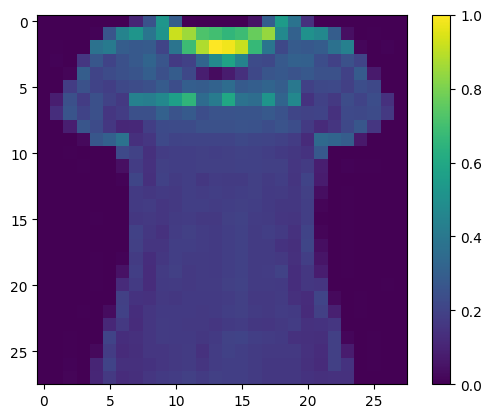

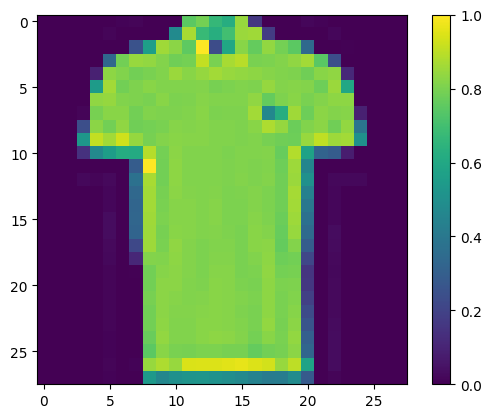

1.0


In [ ]:
# array index
this_pair = 8

# show images at this index
show_image(ts_pairs[this_pair][0])
show_image(ts_pairs[this_pair][1])

# print the label for this pair
print(ts_y[this_pair])

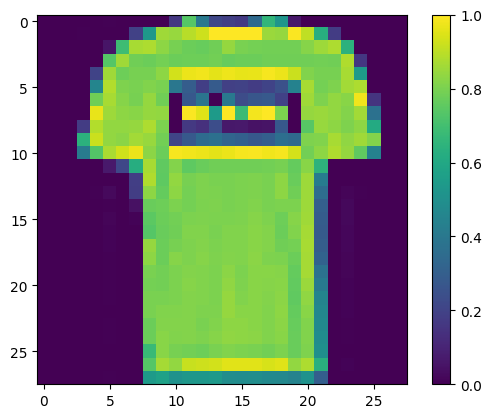

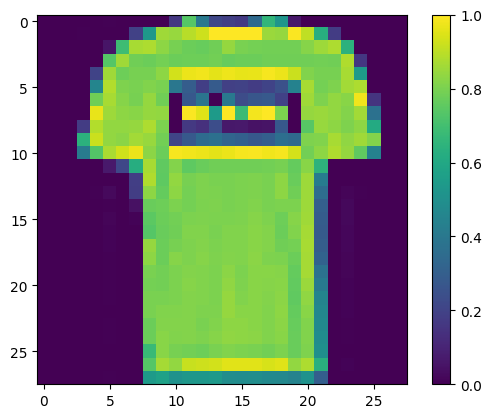

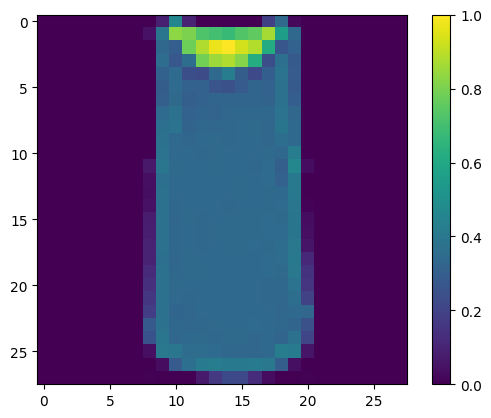

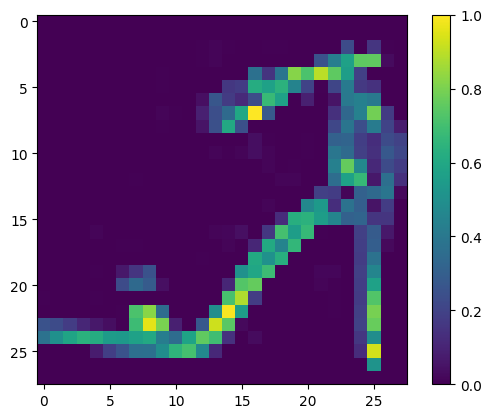

In [ ]:
# print other pairs

show_image(tr_pairs[:,0][0])
show_image(tr_pairs[:,0][1])

show_image(tr_pairs[:,1][0])
show_image(tr_pairs[:,1][1])

Build the Model

In [ ]:
def initialize_base_network():
    input = Input(shape=(28,28,), name="base_input")
    x = Flatten(name="flatten_input")(input)
    x = Dense(128, activation='relu', name="first_base_dense")(x)
    x = Dropout(0.1, name="first_dropout")(x)
    x = Dense(128, activation='relu', name="second_base_dense")(x)
    x = Dropout(0.1, name="second_dropout")(x)
    x = Dense(128, activation='relu', name="third_base_dense")(x)

    return Model(inputs=input, outputs=x)


def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [ ]:
base_network = initialize_base_network()

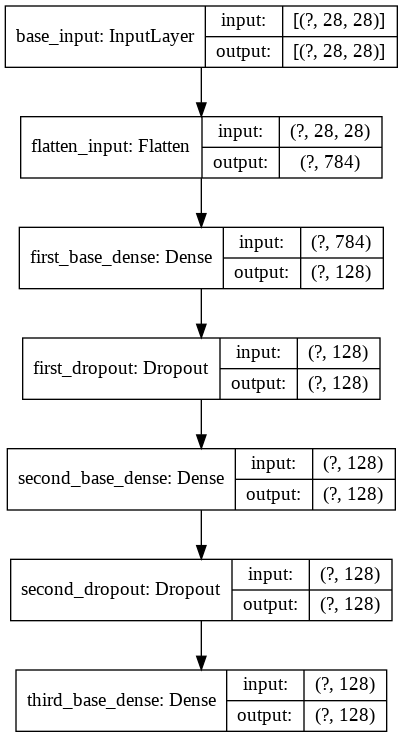

In [ ]:
# create the left input and point to the base network
input_a = Input(shape=(28,28,), name="left_input")
vect_output_a = base_network(input_a)

# create the right input and point to the base network
input_b = Input(shape=(28,28,), name="right_input")
vect_output_b = base_network(input_b)

# measure the similarity of the two vector outputs
output = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

# specify the inputs and output of the model
model = Model([input_a, input_b], output)

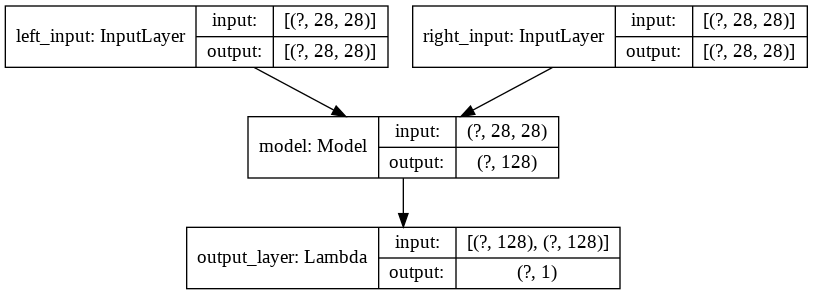

Train the Model

In [ ]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [ ]:
rms = RMSprop()
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms)
history = model.fit([tr_pairs[:,0], tr_pairs[:,1]], tr_y, epochs=20, batch_size=128, validation_data=([ts_pairs[:,0], ts_pairs[:,1]], ts_y))

Epoch 1/20
938/938 [==============================] - 13s 13ms/step - loss: 0.1111 - val_loss: 0.0910
Epoch 2/20
938/938 [==============================] - 13s 14ms/step - loss: 0.0828 - val_loss: 0.0780
Epoch 3/20
938/938 [==============================] - 13s 14ms/step - loss: 0.0745 - val_loss: 0.0749
Epoch 4/20
938/938 [==============================] - 16s 17ms/step - loss: 0.0699 - val_loss: 0.0697
Epoch 5/20
938/938 [==============================] - 16s 17ms/step - loss: 0.0662 - val_loss: 0.0691
Epoch 6/20
938/938 [==============================] - 12s 13ms/step - loss: 0.0633 - val_loss: 0.0706
Epoch 7/20
938/938 [==============================] - 10s 11ms/step - loss: 0.0612 - val_loss: 0.0651
Epoch 8/20
938/938 [==============================] - 10s 11ms/step - loss: 0.0602 - val_loss: 0.0656
Epoch 9/20
938/938 [==============================] - 10s 11ms/step - loss: 0.0587 - val_loss: 0.0642
Epoch 10/20
938/938 [==============================] - 11s 11ms/step - loss: 0.057

Model Evaluation

In [ ]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [ ]:
loss = model.evaluate(x=[ts_pairs[:,0],ts_pairs[:,1]], y=ts_y)

y_pred_train = model.predict([tr_pairs[:,0], tr_pairs[:,1]])
train_accuracy = compute_accuracy(tr_y, y_pred_train)

y_pred_test = model.predict([ts_pairs[:,0], ts_pairs[:,1]])
test_accuracy = compute_accuracy(ts_y, y_pred_test)

print("Loss = {}, Train Accuracy = {} Test Accuracy = {}".format(loss, train_accuracy, test_accuracy))

625/625 [==============================] - 2s 3ms/step
Loss = 0.060875583440065384, Train Accuracy = 0.9406901150191699 Test Accuracy = 0.9166166166166166


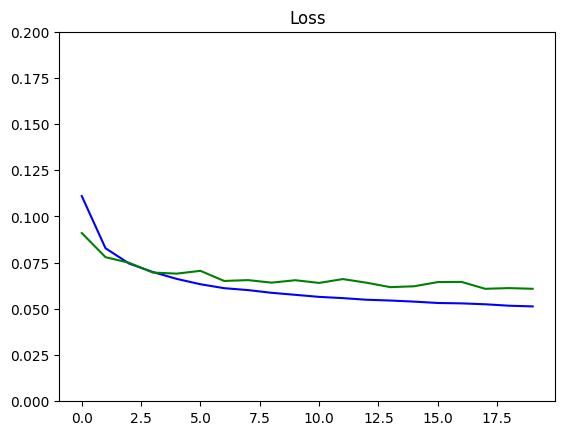

In [ ]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


plot_metrics(metric_name='loss', title="Loss", ylim=0.2)

In [ ]:
# Matplotlib config
def visualize_images():
    plt.rc('image', cmap='gray_r')
    plt.rc('grid', linewidth=0)
    plt.rc('xtick', top=False, bottom=False, labelsize='large')
    plt.rc('ytick', left=False, right=False, labelsize='large')
    plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
    plt.rc('text', color='a8151a')
    plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts


# utility to display a row of digits with their predictions
def display_images(left, right, predictions, labels, title, n):
    plt.figure(figsize=(17,3))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    plt.grid(None)
    left = np.reshape(left, [n, 28, 28])
    left = np.swapaxes(left, 0, 1)
    left = np.reshape(left, [28, 28*n])
    plt.imshow(left)
    plt.figure(figsize=(17,3))
    plt.yticks([])
    plt.xticks([28*x+14 for x in range(n)], predictions)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if predictions[i] > 0.5: t.set_color('red') # bad predictions in red
    plt.grid(None)
    right = np.reshape(right, [n, 28, 28])
    right = np.swapaxes(right, 0, 1)
    right = np.reshape(right, [28, 28*n])
    plt.imshow(right)


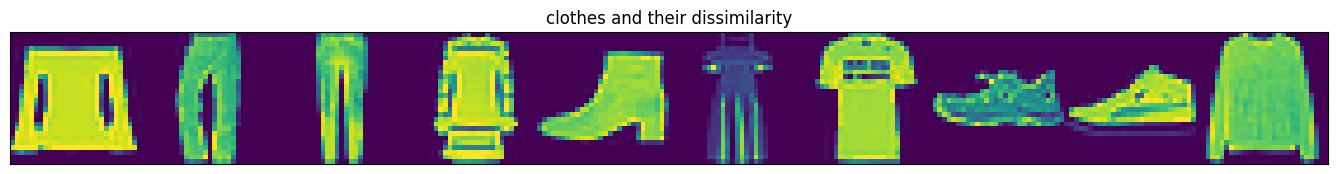

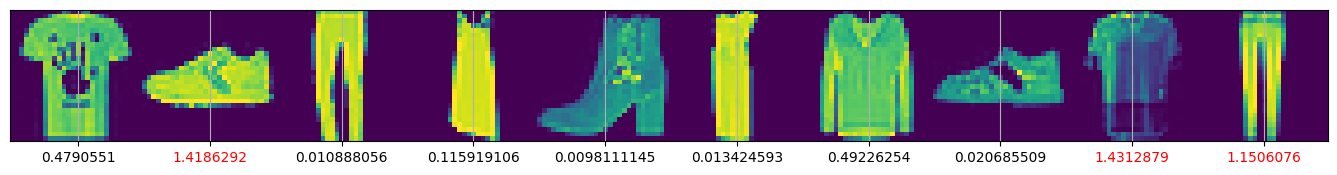

In [ ]:
y_pred_train = np.squeeze(y_pred_train)
indexes = np.random.choice(len(y_pred_train), size=10)
display_images(tr_pairs[:, 0][indexes], tr_pairs[:, 1][indexes], y_pred_train[indexes], tr_y[indexes], "clothes and their dissimilarity", 10)

### 1.2.3 Multiple Output Models using the Keras Functional API

Using the Keras functional API to train a model to predict two outputs. For this ,use the **[Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)** from the **UCI machine learning repository**. It has separate datasets for red wine and white wine.

Normally, the wines are classified into one of the quality ratings specified in the attributes. In this exercise, combine the two datasets to predict the wine quality and whether the wine is red or white solely from the attributes.

Also model wine quality estimations as a regression problem and wine type detection as a binary classification problem.



#### Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


#### Load Dataset


Download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).

**Pre-process the white wine dataset**
Add a new column named `is_red` in dataframe to indicate if the wine is white or red.
- In the white wine dataset,fill the column `is_red` with  zeros (0).

In [ ]:
# URL of the white wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# load the dataset from the URL
white_df = pd.read_csv(URL, sep=";")

# fill the `is_red` column with zeros.
white_df["is_red"] = 0

# keep only the first of duplicate items
white_df = white_df.drop_duplicates(keep='first')

In [ ]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

8.8
9.1


#### Pre-process the red wine dataset
- In the red wine dataset, fill in the column `is_red` with ones (1).

In [ ]:
# URL of the red wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# load the dataset from the URL
red_df = pd.read_csv(URL, sep=";")

# fill the `is_red` column with ones.
red_df["is_red"] = 1

# keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')

In [ ]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])

9.4
10.2


#### Concatenate the datasets

Next, concatenate the red and white wine dataframes.

In [ ]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [ ]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
9.5


In [ ]:
# NOTE: In a real-world scenario, should shuffle the data. This can be done by using the below command
#df = df.iloc[np.random.permutation(len(df))]

This will chart the quality of the wines.

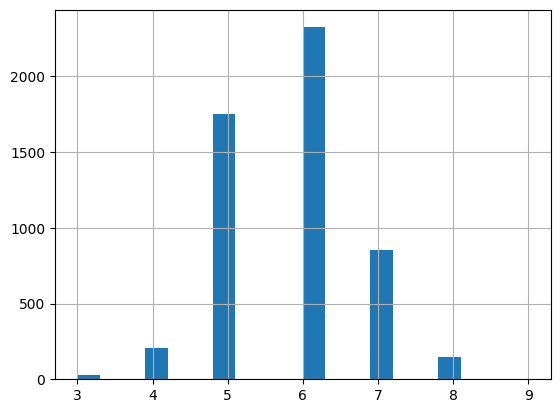

In [ ]:
df['quality'].hist(bins=20);

#### Imbalanced data
Observe from the plot above that the wine quality dataset is imbalanced.
- Since there are very few observations with quality equal to 3, 4, 8 and 9,  can drop these observations from the dataset.
- Can do this by removing data belonging to all classes except those > 4 and < 8.

In [ ]:
# get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8 )]

# reset index and drop the old one
df = df.reset_index(drop=True)

In [ ]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
10.9


You can plot again to see the new range of data and quality

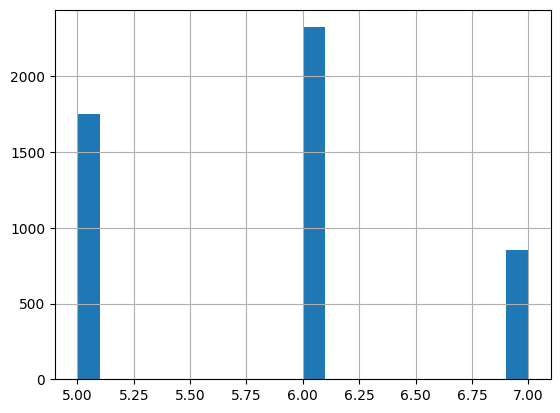

In [ ]:
df['quality'].hist(bins=20);

#### Train Test Split

Next, split the datasets into training, test and validation datasets.
- The data frame should be split 80:20 into `train` and `test` sets.
- The resulting `train` should then be split 80:20 into `train` and `val` sets.
- The `train_test_split` parameter `test_size` takes a float value that ranges between 0. and 1, and represents the proportion of the dataset that is allocated to the test set.  The rest of the data is allocated to the training set.

In [ ]:
# split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=0.2, random_state = 1)

# split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.2, random_state = 1)

Explore the training stats. Pop the labels 'is_red' and 'quality' from the data as these will be used as the labels


In [ ]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

Explore the training stats!

In [ ]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


#### Get the labels

The features and labels are currently in the same dataframe.
- You will want to store the label columns `is_red` and `quality` separately from the feature columns.  
- The following function, `format_output`, gets these two columns from the dataframe (it's given to you).
- `format_output` also formats the data into numpy arrays.
- Please use the `format_output` and apply it to the `train`, `val` and `test` sets to get dataframes for the labels.

In [ ]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [ ]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)

# format the output of the test set
test_Y = format_output(test)

Notice that after you get the labels, the `train`, `val` and `test` dataframes no longer contain the label columns, and contain just the feature columns.
- This is because you used `.pop` in the `format_output` function.

In [ ]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


#### Normalize the data

Next, normalize the data, x, using the formula:
$$x_{norm} = \frac{x - \mu}{\sigma}$$



In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [ ]:
# normalize the train set
norm_train_X = norm(train)

# normalize the val set
norm_val_X = norm(val)

# normalize the test set
norm_test_X = norm(test)

#### Define the Model

Define the model using the functional API. The base model will be 2 `Dense` layers of 128 neurons each, and have the `'relu'` activation.
- Check out the documentation for [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

In [ ]:
def base_model(inputs):

    # connect a Dense layer with 128 neurons and a relu activation
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(inputs)

    # connect another Dense layer with 128 neurons and a relu activation
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(x)
    return x

#### Define output layers of the model

Add output layers to the base model.
- The model will need two outputs.

One output layer will predict wine quality, which is a numeric value.
- Define a `Dense` layer with 1 neuron.
- Since this is a regression output, the activation can be left as its default value `None`.

The other output layer will predict the wine type, which is either red `1` or not red `0` (white).
- Define a `Dense` layer with 1 neuron.
- Since there are two possible categories, can use a sigmoid activation for binary classification.

Define the `Model`
- Define the `Model` object, and set the following parameters:
  - `inputs`: pass in the inputs to the model as a list.
  - `outputs`: pass in a list of the outputs that defined: wine quality, then wine type.


In [ ]:
def final_model(inputs):

    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for regression
    wine_quality = Dense(units='1', name='wine_quality')(x)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wine_type = Dense(units='1', activation='sigmoid', name='wine_type')(x)

    # define the model using the input and output layers
    model = Model(inputs=inputs, outputs=[wine_quality, wine_type])

    return model

#### Compiling the Model

Next, compile the model. When setting the loss parameter of `model.compile`,
 setting the loss for each of the two outputs (wine quality and wine type).

To set more than one loss, use a dictionary of key-value pairs.
- Look at the docs for the losses [here](https://www.tensorflow.org/api_docs/python/tf/keras/losses#functions).

- wine_type: Since performing binary classification on wine type, should use the `binary crossentropy` loss function for it.  Pass this in as a string.  

- wine_quality: since this is a regression output, use the `mean squared error`.  Pass it in as a string, all lowercase.


Also set the metric for each of the two outputs.  Again, to set metrics for two or more outputs, use a dictionary with key value pairs.
- The metrics documentation is linked [here](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).
- For the wine type,set it to accuracy as a string, all lowercase.
- For wine quality, use the root mean squared error.  Instead of a string, set it to an instance of the class [RootMeanSquaredError](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError), which belongs to the tf.keras.metrics module.



In [ ]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms,
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mean_squared_error'
                     },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality': tf.keras.metrics.RootMeanSquaredError()
                       }
             )


#### Training the Model

Fit the model to the training inputs and outputs.
- Check the documentation for [model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit).
- Use the normalized training set as inputs.
- For the validation data,use the normalized validation set.

In [ ]:
history = model.fit(norm_train_X, train_Y,
                    epochs = 180, validation_data=(norm_val_X, val_Y))

Epoch 1/180
99/99 [==============================] - 3s 12ms/step - loss: 23.5343 - wine_quality_loss: 22.8677 - wine_type_loss: 0.6666 - wine_quality_root_mean_squared_error: 4.7820 - wine_type_accuracy: 0.5734 - val_loss: 15.7538 - val_wine_quality_loss: 15.1208 - val_wine_type_loss: 0.6330 - val_wine_quality_root_mean_squared_error: 3.8885 - val_wine_type_accuracy: 0.6515
Epoch 2/180
99/99 [==============================] - 0s 3ms/step - loss: 10.3225 - wine_quality_loss: 9.7388 - wine_type_loss: 0.5838 - wine_quality_root_mean_squared_error: 3.1207 - wine_type_accuracy: 0.8437 - val_loss: 5.9010 - val_wine_quality_loss: 5.3695 - val_wine_type_loss: 0.5315 - val_wine_quality_root_mean_squared_error: 2.3172 - val_wine_type_accuracy: 0.9607
Epoch 3/180
99/99 [==============================] - 0s 3ms/step - loss: 4.2636 - wine_quality_loss: 3.7928 - wine_type_loss: 0.4707 - wine_quality_root_mean_squared_error: 1.9475 - wine_type_accuracy: 0.9572 - val_loss: 2.9982 - val_wine_quality_l

In [ ]:
# Gather the training metrics
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')


25/25 [==============================] - 0s 4ms/step - loss: 0.3469 - wine_quality_loss: 0.3201 - wine_type_loss: 0.0268 - wine_quality_root_mean_squared_error: 0.5658 - wine_type_accuracy: 0.9949

loss: 0.3468874394893646
wine_quality_loss: 0.3201131224632263
wine_type_loss: 0.026774311438202858
wine_quality_rmse: 0.5657854080200195
wine_type_accuracy: 0.9949302673339844


#### Analyze the Model Performance

Note that the model has two outputs. The output at index 0 is quality and index 1 is wine type

So, round the quality predictions to the nearest integer.

In [ ]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

31/31 [==============================] - 0s 2ms/step


In [ ]:
print(quality_pred[0])

[5.4853034]


In [ ]:
print(type_pred[0])
print(type_pred[944])

[6.0390885e-05]
[0.9999956]


#### Plot Utilities

Define a few utilities to visualize the model performance.

In [ ]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


In [ ]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

In [ ]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

#### Plots for Metrics

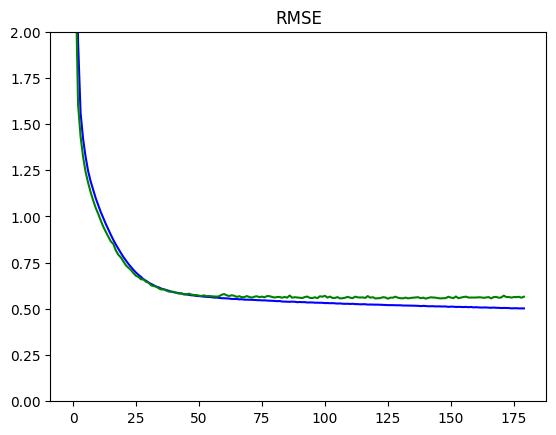

In [ ]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

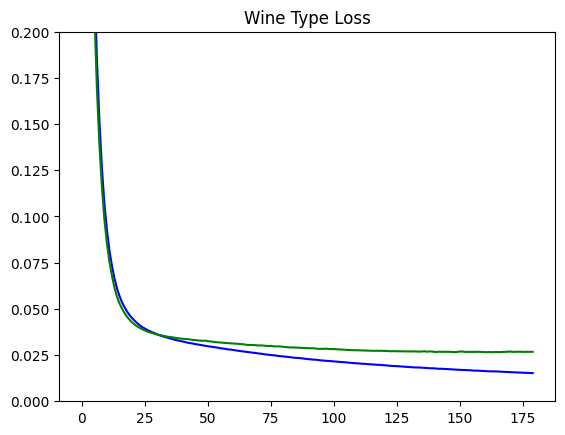

In [ ]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

#### Plots for Confusion Matrix

Plot the confusion matrices for wine type.See that the model performs well for prediction of wine type from the confusion matrix and the loss metrics.

<ipython-input-70-47bb6e202cb0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-70-47bb6e202cb0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


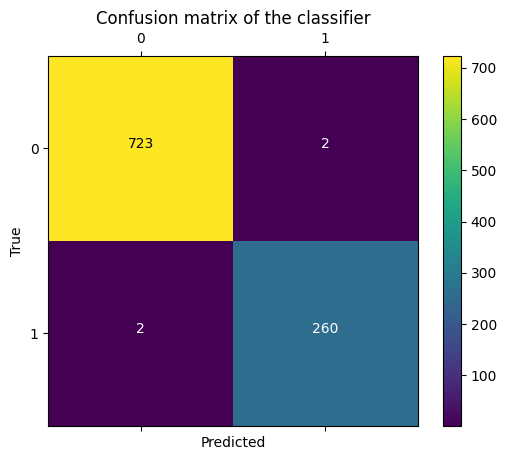

In [ ]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

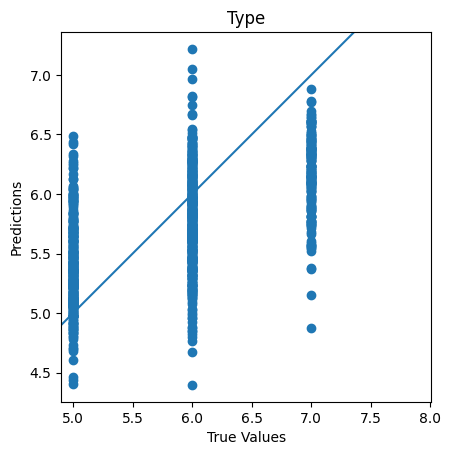

In [ ]:
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')

## 1.3 Custom Loss Functions

### 1.3.1 Methods of Using a Loss Function

1. **Using String Identifier**:
```python
model.compile(loss='mse', optimizer='sgd')
```
Here, `'mse'` is a string identifier for the mean squared error loss function. TensorFlow's Keras API recognizes this string and uses the corresponding built-in MSE loss function.

2. **Using Imported Function (As an Object)**:
```python
from tensorflow.keras.losses import mean_squared_error
model.compile(loss=mean_squared_error, optimizer='sgd')
```
In this line, `mean_squared_error` is imported from `tensorflow.keras.losses`. Instead of using a string identifier, the imported function object itself is passed as the loss argument. This achieves the same result as the first line, using the MSE loss function.


### 1.3.2 Custom Loss Functions (Huber Loss)

The Huber loss function is a loss function used in robust regression, particularly when dealing with outliers. It is less sensitive to outliers compared to the mean squared error (MSE) loss function. The Huber loss combines quadratic and linear loss functions, behaving like the mean squared error function near the origin and like the mean absolute error function away from it.

Mathematically, the Huber loss function is defined as follows:

$$ L_{\delta}(y, f(x)) = \begin{cases}
\frac{1}{2}(y - f(x))^2 & \text{if } |y - f(x)| \leq \delta \\
\delta(|y - f(x)| - \frac{1}{2}\delta) & \text{otherwise}
\end{cases} $$

where:
- $ y $ is the true value.
- $ f(x) $ is the predicted value.
- $ \delta $ is a threshold parameter that determines when the loss function transitions from quadratic to linear.


#### String Identifier Method


To implement the Huber loss function as a Custom function in tensorflow,

```python
import tensorflow as tf

def huber_loss(y_true, y_pred, delta=1.0):
    residual = tf.abs(y_true - y_pred)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * (residual - 0.5 * delta)
    return tf.where(condition, small_res, large_res)

# Example usage:
# Define your model and compile it with the custom Huber loss function
model = tf.keras.Sequential([...])  # Define your model here
model.compile(optimizer='adam', loss=huber_loss)

# Train your model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
```

Also this can be modified into the below code to change threshold
```python
def my_huber_loss_with_threshold(threshold):
 def my_huber_loss(y_true, y_pred):
 error = y_true - y_pred
 is_small_error = tf.abs(error) <= threshold
 small_error_loss = tf.square(error) / 2
 big_error_loss = threshold * (tf.abs(error) - (0.5 * threshold))
 return tf.where(is_small_error, small_error_loss, big_error_loss)
 return my_huber_loss

model.compile(
 optimizer='sgd', loss=my_huber_loss_with_threshold(threshold=1))

```


#### Using Imported Function Method

```python
from tensorflow.keras.losses import Loss

class MyHuberLoss(Loss):
 threshold = 1

 def __init__(self, threshold):
  super().__init__()
  self.threshold = threshold

 def call(self, y_true, y_pred):
  error = y_true - y_pred
  is_small_error = tf.abs(error) <= self.threshold
  small_error_loss = tf.square(error) / 2
  big_error_loss = self.threshold * (tf.abs(error) - (0.5 * self.threshold))
  return tf.where(is_small_error, small_error_loss, big_error_loss)

model.compile(optimizer='sgd', loss=MyHuberLoss(threshold=1))
```

### 1.3.3 Contrastive Loss

Contrastive loss is commonly used in siamese or triplet networks, which are often employed in tasks such as face recognition, image similarity, or recommendation systems. These networks are designed to learn embeddings for input samples in such a way that similar samples are closer together in the embedding space while dissimilar samples are pushed further apart.

The contrastive loss encourages similar samples (positive pairs) to have embeddings that are close together and dissimilar samples (negative pairs) to have embeddings that are far apart. It penalizes the model when the distance between similar samples is greater than a margin, and when the distance between dissimilar samples is smaller than a margin.

Mathematically, the contrastive loss function can be defined as follows:

$$ L(y, f(x)) = \frac{1}{2N} \sum_{i=1}^{N} [y \cdot d^2 + (1 - y) \cdot \text{max}(0, m - d)^2] $$

where:
- $ y $ is the binary label indicating whether the pair of samples are similar (1) or dissimilar (0).
- $ f(x) $ represents the distance or dissimilarity function between the embeddings of the samples.
- $ d $ is the distance or dissimilarity between the embeddings of the samples.
- $ m $ is the margin that controls the minimum difference in distance for dissimilar pairs.
- $ N $ is the number of pairs.

If $ y = 1 $, indicating a similar pair, the loss penalizes the model based on the squared distance $ d $. If $ y = 0 $, indicating a dissimilar pair, the loss is only applied if $ d $ is less than the margin $ m $, in which case the loss is proportional to the squared difference between $ m $ and $ d $.

To implement the contrastive loss function in TensorFlow:

```python
import tensorflow as tf

def contrastive_loss(y_true, distance, margin=1):
    squared_distance = tf.square(distance)
    positive_pair_loss = y_true * squared_distance
    negative_pair_loss = (1 - y_true) * tf.square(tf.maximum(margin - distance, 0))
    return tf.reduce_mean(positive_pair_loss + negative_pair_loss) / 2

# Example usage:
# Define model and compile it with the custom contrastive loss function
model = tf.keras.Sequential([...])  # Define siamese or triplet network model here
model.compile(optimizer='adam', loss=contrastive_loss)

# Train the model with pairs of similar and dissimilar samples
model.fit([x1, x2], y, epochs=10, batch_size=32)
```


## 1.4 Custom Layers

### 1.4.1 Custom Lambda Layers

```python
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(10, activation='softmax')
])
```

Consider the 'relu' activation function. It can be described as a simple function ;
``` python
if(x>0):
 return x
else:
 return 0
```
As above , its possible to write own activation functions.

**Example : Absolute Function**

```python
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128),
 tf.keras.layers.Lambda(lambda x: tf.abs(x)),
 tf.keras.layers.Dense(10, activation='softmax')
])
```
**Example : Custom ReLu Function**
```python
def my_relu(x):
 return K.maximum(0.0, x)
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128),
 tf.keras.layers.Lambda(my_relu),
 tf.keras.layers.Dense(10, activation='softmax')
])
```